In [1]:
from Jiaxin import *
from Peilun import *
from Yijun import *

# Data Preparation

## Getting the Dataset

Merge all given 10 dataframes on the foreign keys provided into 1 dataframe and convert this dataframe into a pickle file.

We chose to sample 100k rows out of the original 800k because we have relatively strongly correlated attributes in the dataset, so we do not need that much data to decrease the uncertainty in the parameters of our models.


In [2]:
# get_dataset()

## Cleaning the Dataset

Set the allowed percentage of missing data to be 50% in general, unless they are important columns (good predictors for regression). 

In this case, none of the columns with more than 50% missing data is important and we drop all of them.

In [3]:
df = clean_dataset()

## Exploratory Data Analysis

Now that our dataframe is ready, let's explore the dataset with a time series and interactive map.

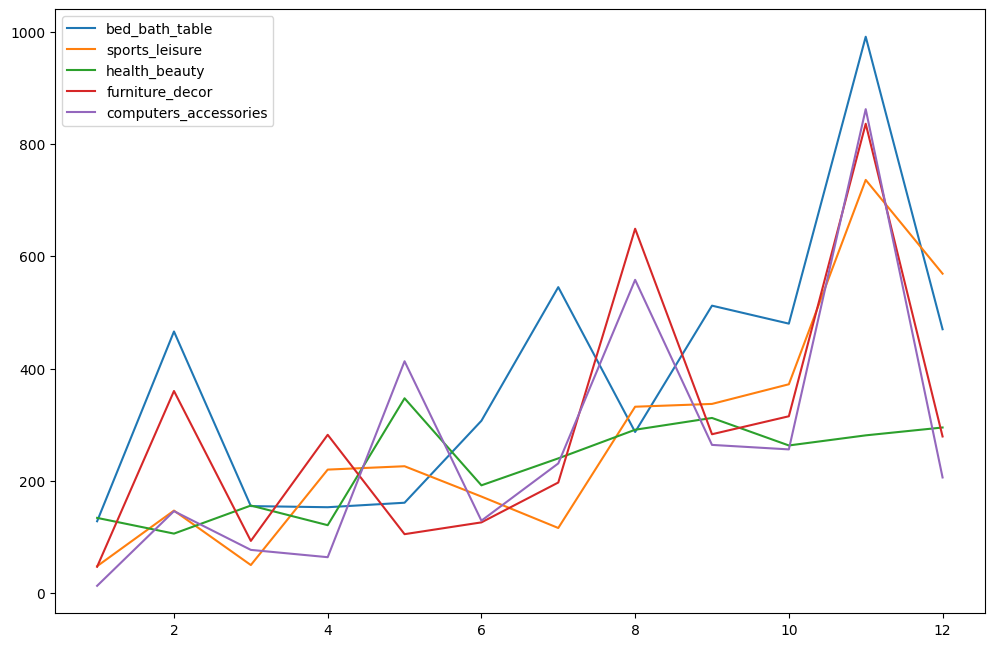

In [4]:
time_series()

We notice that there is a generally increasing trend in sales of all product categories over the year, and the spike is especially significant in November.

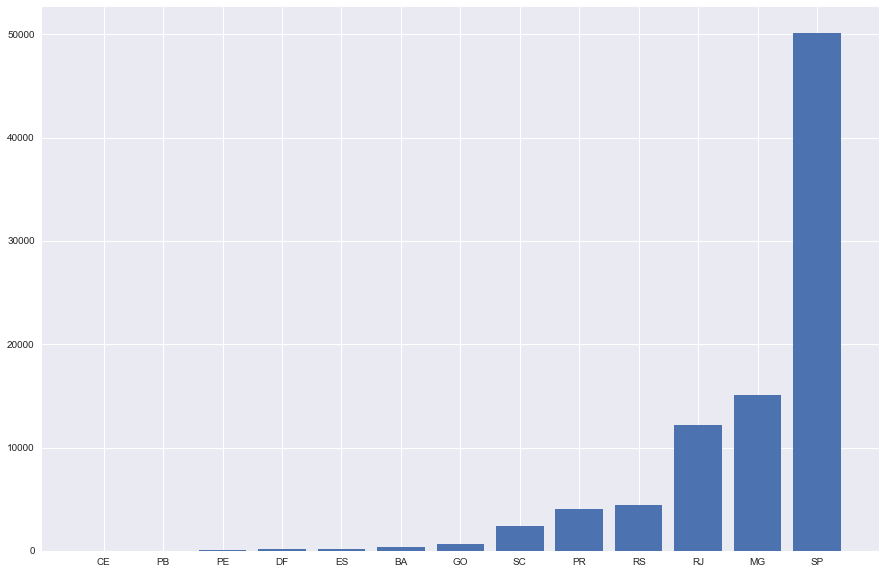

SP    50133
MG    15118
RJ    12140
RS     4448
PR     4064
SC     2366
GO      634
BA      414
ES      178
DF      160
PE      100
PB       25
CE       22
Name: customer_state, dtype: int64


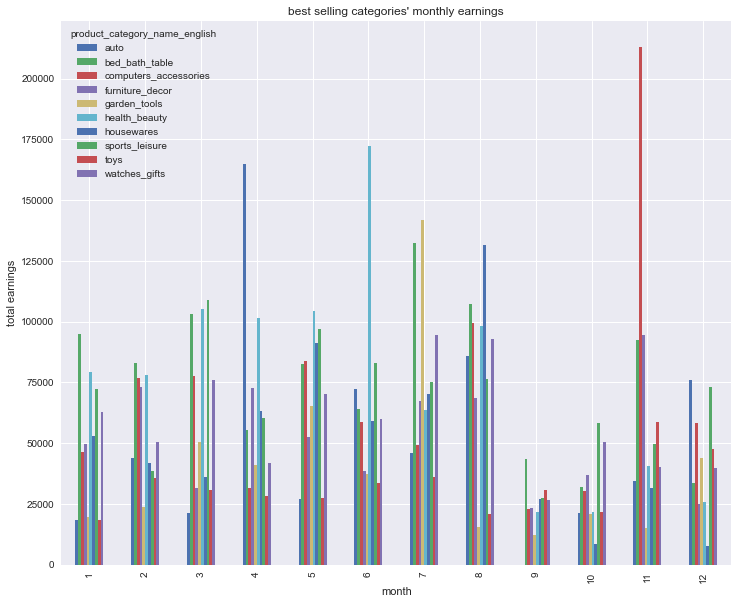

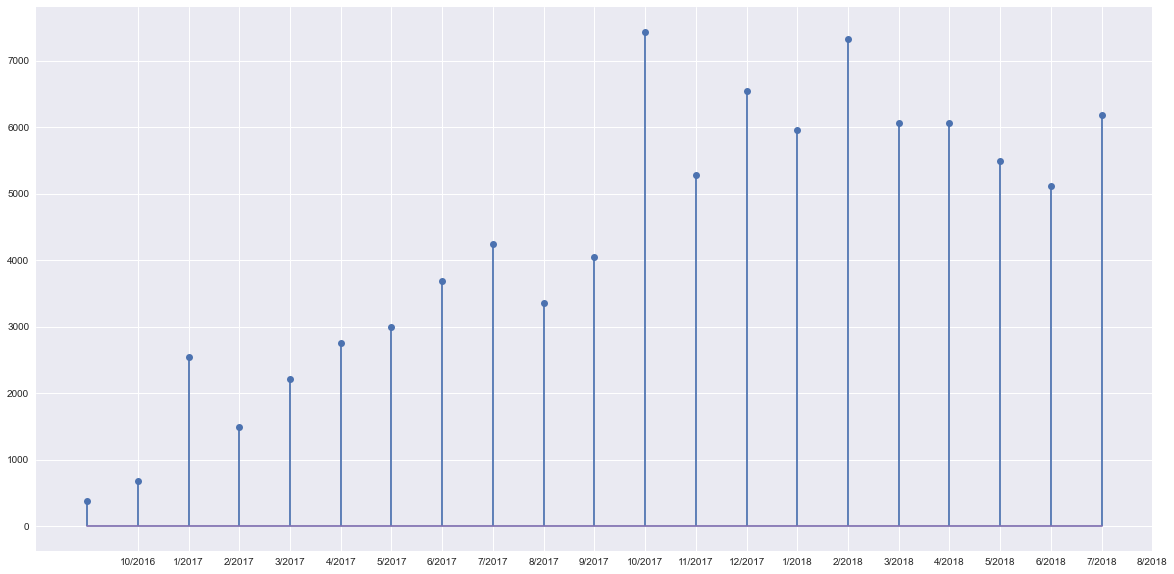

In [5]:
findings()

We order the number of customers by their states, and we find that most orders came from Sao Paulo. From the map, we can very clearly see the distribution of customers, with the radius of each circle corresponding to customer count from that state.

Then we look at the popularity of each category of products over the entire time period, and we notice that the sales of computer accessories is generally consistent, except in December where there was a huge increase.

Finally, the lollipop graph shows us that the period of high sales for Olist was Nov 2017 to Jun 2018.

---
# Problem 1: What are the factors affecting the price of a product?
First we take a look into all the correlation of numerical datas in the clean dataset by using a heatmap, and then plan out varius methods for feature selection to predict the price of a product.

## Feature Selection
> ### Pearson Correlation <br>
> Using Pearson Correlation to show all the correlation relationship between one and another.

                             review_score  payment_sequential  \
review_score                     1.000000           -0.019239   
payment_sequential              -0.019239            1.000000   
payment_installments            -0.110187           -0.093768   
payment_value                   -0.180759           -0.086385   
order_item_id                   -0.258657           -0.022820   
price                            0.006689            0.002710   
freight_value                   -0.002017            0.000929   
product_name_lenght             -0.004379           -0.032574   
product_description_lenght       0.068885            0.033469   
product_photos_qty               0.047227           -0.036925   
product_weight_g                -0.009394            0.003851   
product_length_cm                0.007248           -0.030984   
product_height_cm               -0.008679            0.028150   
product_width_cm                -0.013615           -0.047751   
seller_zip_code_prefix   

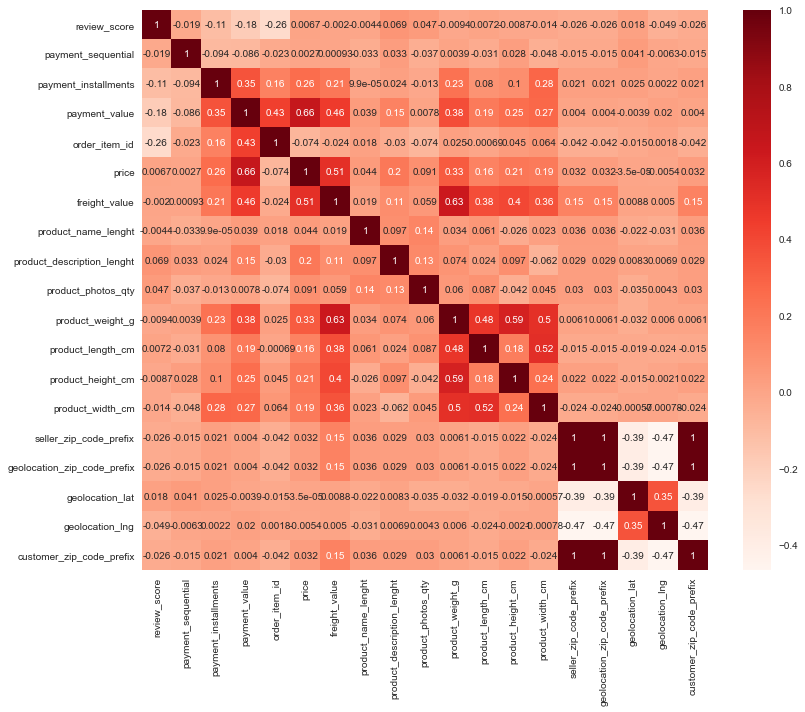

In [6]:
Pearson_Corr_values()

> ### Principal Component Analysis (PCA)
> *PCA is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set. It can be thought of as a projection method where data with m-columns (features) is projected into a subspace with m or fewer columns, whilst retaining the essence of the original data.*<br>
>
> Finds and chooses the optimal variables to be used to be our predictors against `price`

---Principal components---


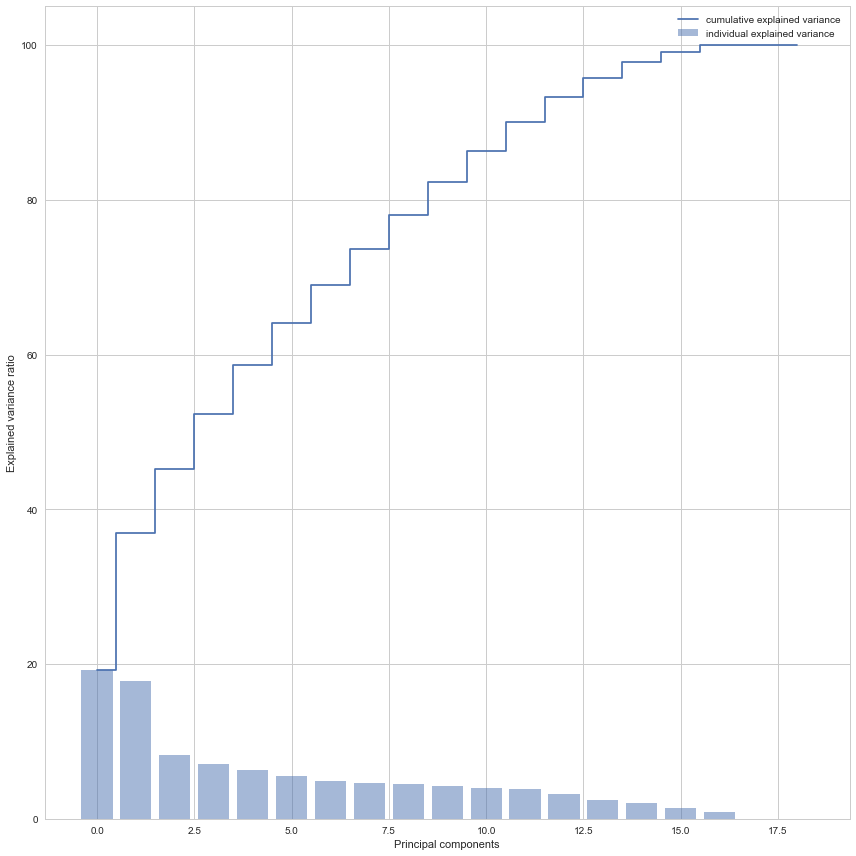

In [7]:
Principal_comp()

> ### Model Based Feature Selection
> *Displays the features importance in regards to the data using DecisionTreeCrassifier*

---Model-based feature selection (SelectFromModel)---


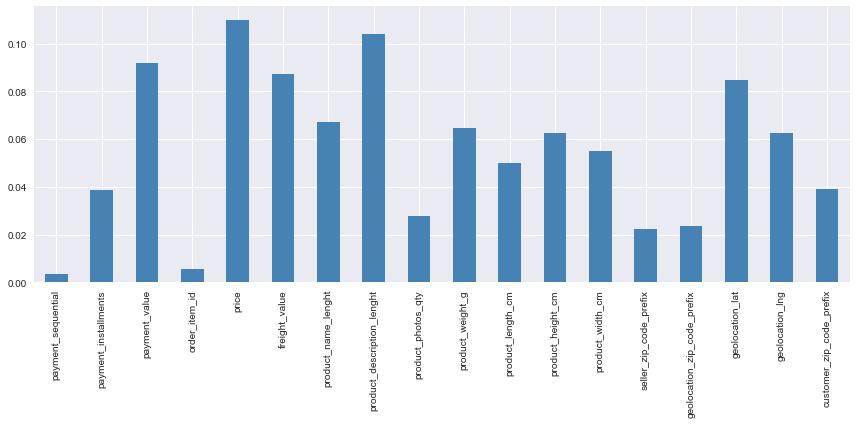

In [8]:
Model_based_fs()

> ### Filtered Pearson Correlation Values
> Now we display variables that only have a correlation score of higher than absolute 0.3

In [9]:
Display_filtered_PCV(0.3)

---corr values that are more than 0.3 scores---

                                                                0
customer_zip_code_prefix    geolocation_lng             -0.466433
geolocation_lng             customer_zip_code_prefix    -0.466433
seller_zip_code_prefix      geolocation_lng             -0.466433
geolocation_lng             geolocation_zip_code_prefix -0.466433
geolocation_zip_code_prefix geolocation_lng             -0.466433
geolocation_lng             seller_zip_code_prefix      -0.466433
geolocation_lat             seller_zip_code_prefix      -0.392118
seller_zip_code_prefix      geolocation_lat             -0.392118
customer_zip_code_prefix    geolocation_lat             -0.392118
geolocation_lat             geolocation_zip_code_prefix -0.392118
geolocation_zip_code_prefix geolocation_lat             -0.392118
geolocation_lat             customer_zip_code_prefix    -0.392118
product_weight_g            price                        0.329081
price                      

> ### Features Selected
> We then now look into variables that are higher than 0.3 correlation against Price.

In [10]:
Target_corr(0.3,'price')

---Features Selected---
payment_value       0.660077
freight_value       0.506292
product_weight_g    0.329081
Name: price, dtype: float64 



In our feature selection, our PCA showed that choosing three predictors would have a good cumulative explained variance of nearly half to represent this information too. Henceforth we will be using `payment_value`, `freight_value`, `product_weight_g` to do our prediction.


---
## Regression
To test and prove that these are some of the factors affecting the price of a product.

> #### Linear Regression
>* We import our dependencies, for linear regression we use sklearn (built in python library) and import linear regression from it. <br>
>* We again import another dependency to split our data into train and test.<br>
>* We've made our train data as 80% and 20% of the data to be our test data , and randomized the splitting of data by using random_state.<br>
>* Next, we fit our train and test data into linear regression model.<br>
>* After fitting our data to the model we found out our prediction, aka score of our data, is <50% accurate<br>

Train Set : (71841, 3) (71841, 1)
Test Set  : (17961, 3) (17961, 1)


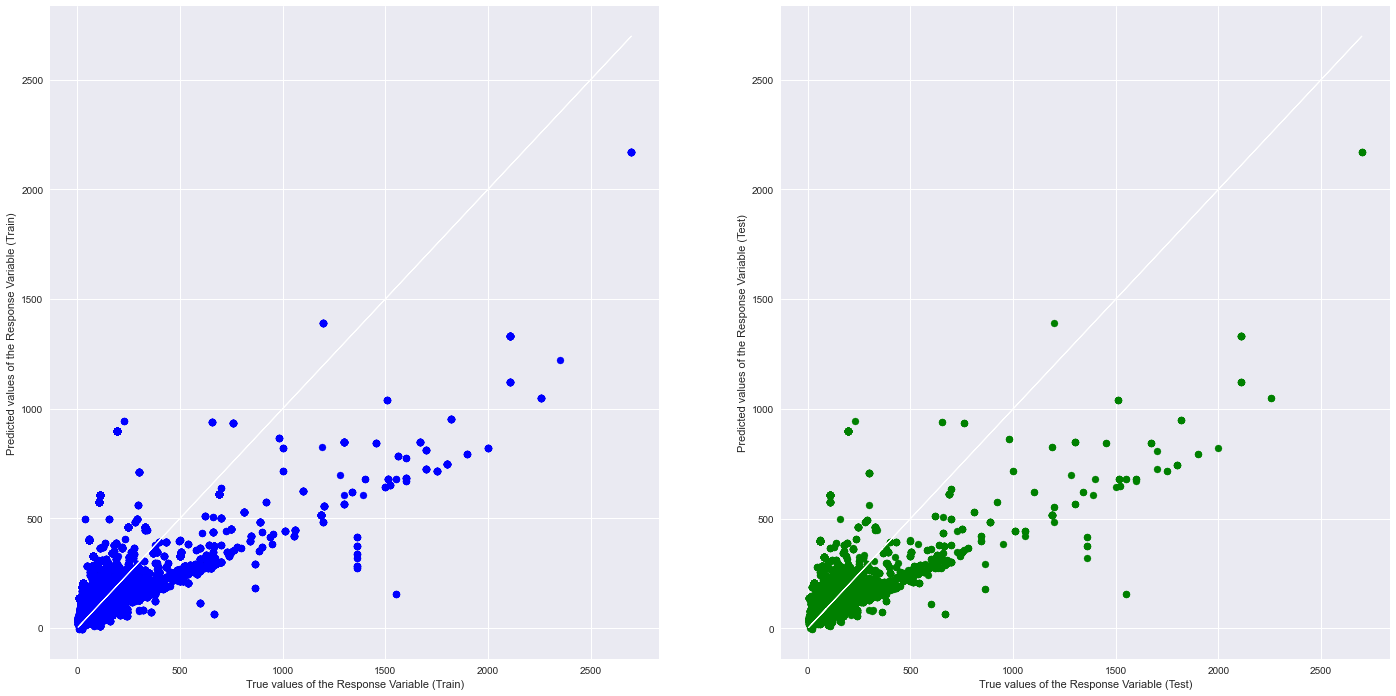

         Pred_Price    price  Difference     %_Error
1024740      343.31   735.00      391.69   53.291156
688925        82.25    60.50      -21.75   35.950413
1114258       30.46    29.39       -1.07    3.640694
698746        46.53    19.90      -26.63  133.819095
695972       117.70   138.00       20.30   14.710145
93561         77.93    59.90      -18.03   30.100167
1276655       82.06   150.00       67.94   45.293333
97213        130.95   119.80      -11.15    9.307179
221896        70.77    49.99      -20.78   41.568314
523622        64.57    59.00       -5.57    9.440678
262198        81.46   149.99       68.53   45.689713
142686        75.31    68.90       -6.41    9.303338
969727        55.61    27.99      -27.62   98.678099
602823        70.38   109.00       38.62   35.431193
771353       935.24   760.00     -175.24   23.057895
192231       577.15   108.00     -469.15  434.398148
443745        67.52    26.18      -41.34  157.906799
1202274       60.17    26.90      -33.27  123.

In [11]:
Predict_Price_Linreg()

To improve our prediction to atleast 85% target, we use a different method named gradient boosting regression for building a better prediction model as it is also used by many experts. <br>
<br>
It is a machine learning technique for regression and classification problems, which produces a same yet better prediction model. <br>

---
> ### Gradient Boosting regression
> We create a variable where we define our gradient boosting regressor and set parameters to it , here:<br>
> - *n_estimator — The number of boosting stages to perform. We do not set it too high which would overfit our model.<br>*
> - *max_depth — The depth of the tree node.<br>*
> - *learning_rate — Rate of learning the data.<br>*
> - *loss — loss function to be optimized. ‘ls’ refers to least squares regression.<br>*
> - *minimum sample split — Number of sample to be split for learning the data.<br>*
>
> We then fit our training data into the gradient boosting model and we have obtained an much higher accuracy of **more than 80%** the previous value!<br>
>
> Thus we henceforth concludes that `payment_value`, `freight_value`, `product_weight_g` are indeed factors affecting the price of a product<br>



Train Set : (71841, 3) (71841, 1)
Test Set  : (17961, 3) (17961, 1)


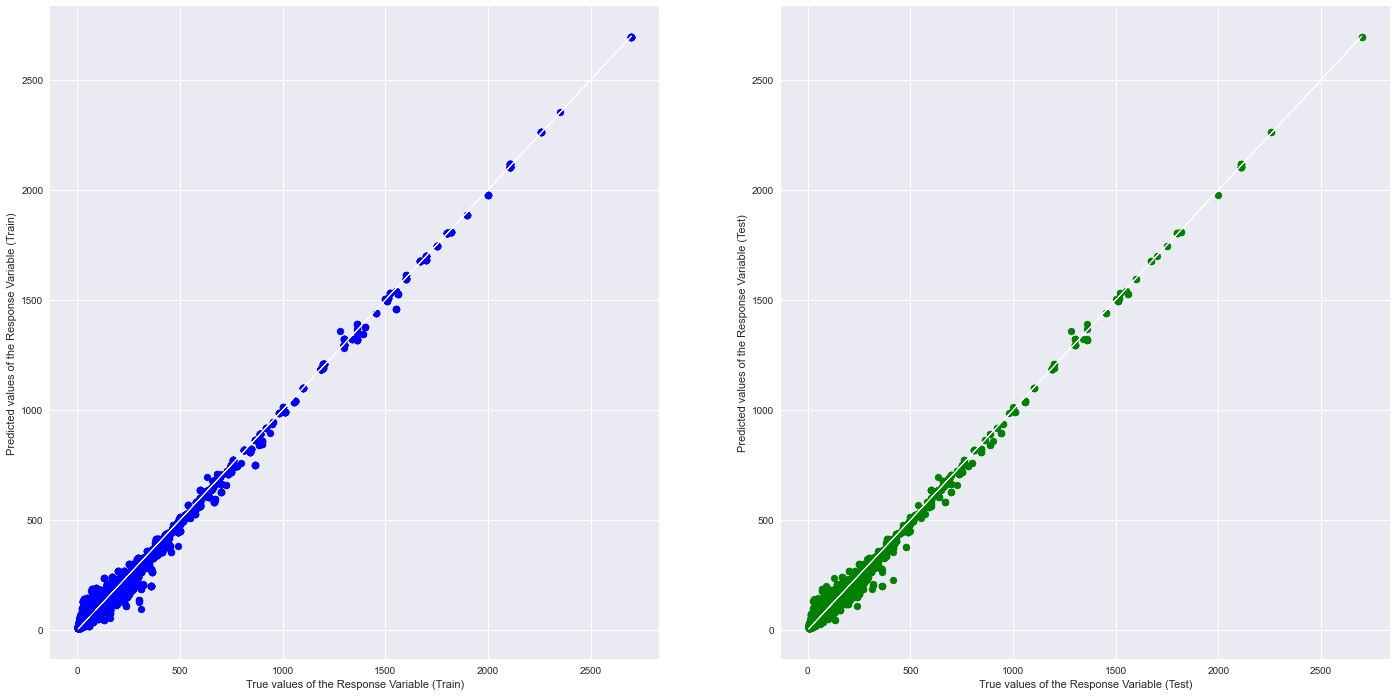

         Pred_Price    price  Difference     %_Error
1024740      709.15   735.00       25.85    3.517007
688925        71.94    60.50      -11.44   18.909091
1114258       29.67    29.39       -0.28    0.952705
698746        21.34    19.90       -1.44    7.236181
695972       135.32   138.00        2.68    1.942029
93561         59.33    59.90        0.57    0.951586
1276655      152.82   150.00       -2.82    1.880000
97213        117.39   119.80        2.41    2.011686
221896        47.14    49.99        2.85    5.701140
523622        59.45    59.00       -0.45    0.762712
262198       138.20   149.99       11.79    7.860524
142686        62.78    68.90        6.12    8.882438
969727        25.87    27.99        2.12    7.574134
602823       100.20   109.00        8.80    8.073394
771353       771.61   760.00      -11.61    1.527632
192231       111.15   108.00       -3.15    2.916667
443745        42.81    26.18      -16.63   63.521772
1202274       29.42    26.90       -2.52    9.

In [12]:
Predict_Price_clf()

From this we could be able to estimate the final price of an item being listed and sold on Olist, and from the point in perspective in interest:

- How much Olist could tax or gain commissions from customers/sellers to maximise profit gains by using their platform.

- Able to compare prices from other platforms that sell cheaper alternatives by obtaining rival data and predicting and comparing their prices.


# Problem 2: Can we predict the category of Customer Lifetime Value (CLV) that customers fall into – low value, mid value, or high value?

Customer Lifetime Value (CLV) is the total monetary value of purchases made by a customer with a business over his entire lifetime - the time period that the customer purchases with the business before moving to your competitors.


*   Low Value: Customers who are less active than others, not very frequent buyers and generate very low/zero/negative revenue.

*   Mid Value: Customers who often use Olist (but not as much as our High Values) and generates moderate revenue.

*    High Value: The group we don’t want to lose. High revenue, frequency and low inactivity.

We will use 3 predictors: recency, frequency and monetary value (or revenue).

### Data Exploration of CLV

## Clustering

In [13]:
CLV_df = CLV_EDA(df)

Time Range: 2016-10-04 TO 2018-08-29
No. of unique customers: 4281
Total sales: 10249070.030000001



### Recency

*Recency refers to the amount of time elapsed since a customer’s last transaction.*

Find the most recent purchase date of each customer and see how many days they are inactive for, then apply k-means clustering to assign customers a recency cluster.


count    89802.000000
mean       237.973364
std        153.178159
min          0.000000
25%        117.000000
50%        218.000000
75%        345.000000
max        693.000000
Name: recency, dtype: float64




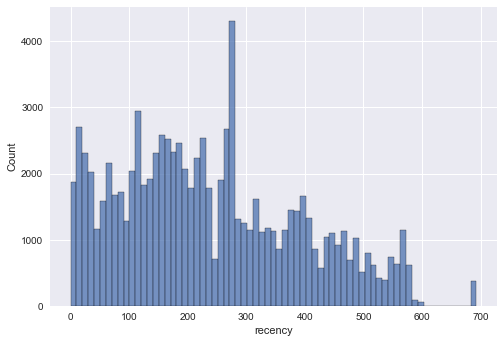

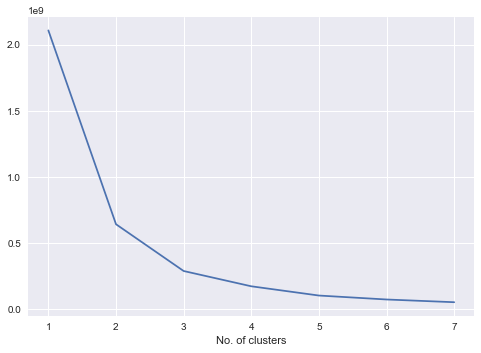

                   count        mean        std    min    25%    50%    75%  \
recency_cluster                                                               
0                23489.0   60.268934  36.801933    0.0   26.0   61.0   93.0   
1                26868.0  181.601906  34.311775  121.0  155.0  180.0  214.0   
2                24471.0  315.723346  46.454685  249.0  275.0  307.0  357.0   
3                14974.0  490.816148  62.483093  404.0  443.0  482.0  541.0   

                   max  
recency_cluster         
0                120.0  
1                248.0  
2                403.0  
3                693.0  




In [14]:
CLV_df = CLV_recency(CLV_df)

From the summary statistics, mean is higher than median, so there is a positive right skew ie. most of the recency values are clustered around the left tail of the distribution.

We also find that the most common customers are those with a recency score of 300.

Elbow method tells us that the optimal number of clusters is 4, with cluster 0 being our worst customers (customers who have not bought from Olist for a long time) and cluster 3 being our best customers.

### Frequency

*Frequency refers to how often a customer has bought from the company.* 

Find the total number orders for each customer.


count    89802.000000
mean        60.458743
std         82.151974
min          1.000000
25%         18.000000
50%         30.000000
75%         64.000000
max        492.000000
Name: frequency, dtype: float64




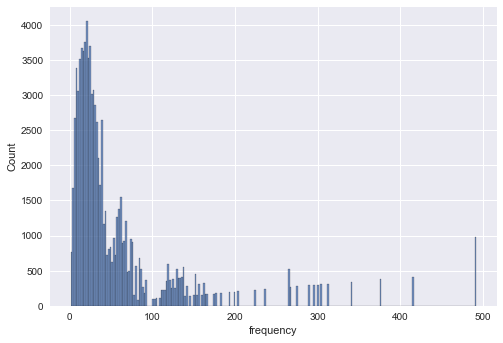

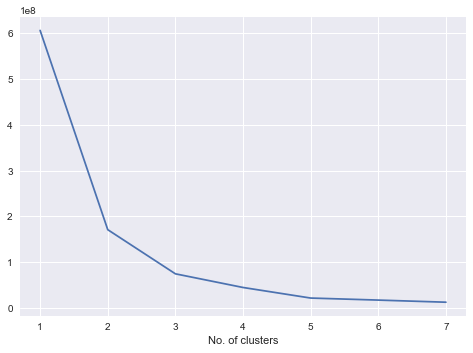

                     count        mean        std    min    25%    50%    75%  \
frequency_cluster                                                               
0                  72690.0   29.539386  18.714952    1.0   15.0   25.0   39.0   
1                  11963.0  127.395720  31.547933   79.0  103.0  128.0  149.0   
2                   3374.0  284.627742  30.823255  223.0  265.0  289.0  305.0   
3                   1775.0  449.424789  49.247664  376.0  415.0  492.0  492.0   

                     max  
frequency_cluster         
0                   77.0  
1                  204.0  
2                  340.0  
3                  492.0  




In [15]:
CLV_df = CLV_frequency(CLV_df)

From the summary statistics, mean is higher than median, so there is a positive right skew ie. most of the frequency values are clustered around the left tail of the distribution.

We also find that the most common customers are those with frequency 1, that means most customers only make one time purchases.  

Elbow method tells us that the optimal number of clusters is 4, with cluster 0 being our worst customers (customers who did not buy from Olist regularly) and cluster 3 being our best customers.

### Revenue

*Revenue refers to how much money a customer has spent with the company.*


count     89802.000000
mean      17874.992941
std       62595.102099
min          21.790000
25%        1432.760000
50%        3414.300000
75%        8600.400000
max      546505.600000
Name: revenue, dtype: float64




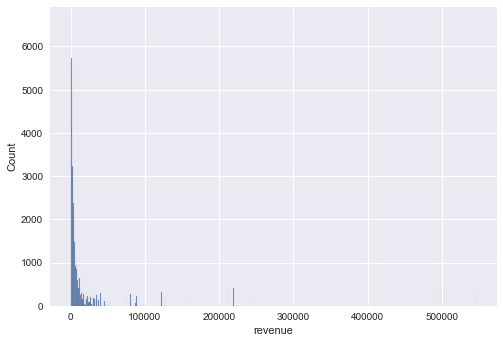

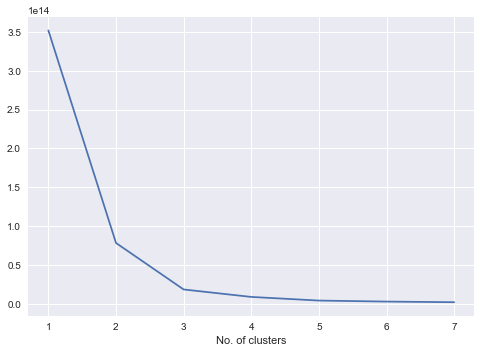

                   count           mean           std        min        25%  \
revenue_cluster                                                               
0                86576.0    7516.190539  12677.921670      21.79    1365.60   
1                 2126.0  186308.375292  43014.430902  122497.44  155054.28   
2                 1100.0  507633.452800  22424.842147  489634.00  489634.00   

                       50%        75%        max  
revenue_cluster                                   
0                  3164.41    7645.84   94754.88  
1                211156.32  219443.70  241312.95  
2                498897.84  498897.84  546505.60  




In [16]:
CLV_df = CLV_revenue(CLV_df)

From the summary statistics, mean is higher than median, so there is a positive right skew ie. most of the revenue values are clustered around the left tail of the distribution.

We also find that the most common customers are those with revenue 100.

Elbow method tells us that the optimal number of clusters is 3, with cluster 0 being our worst customers (customers who have spent the least on Olist products) and cluster 3 being our best customers.

### Overall RFM Score

Combine all 3 individual RFM scores into a single predictor, overall_score and sort it.

In [17]:
CLV_df = overall_RFM(CLV_df)

                  recency   frequency        revenue
overall_score                                       
0               60.598931   29.749422    5131.230773
1              166.164297   40.987272    7311.251893
2              286.638678   53.253856    9051.937142
3              447.888626   57.032588    8578.639771
4              419.995975  173.264520   26665.718186
5              329.133439  327.849881  175949.560175
6              280.636364  390.443636  378934.518400
7              258.000000  492.000000  498897.840000


We can see that score 0 is customers with the least value and 6 is customers with the highest value.

### Categorizing Customers

*    0 to 1: low value
*    2 to 3: mid value
*    4 to 6: high value

In [18]:
CLV_df = categorize(CLV_df)

### Plot Clusters

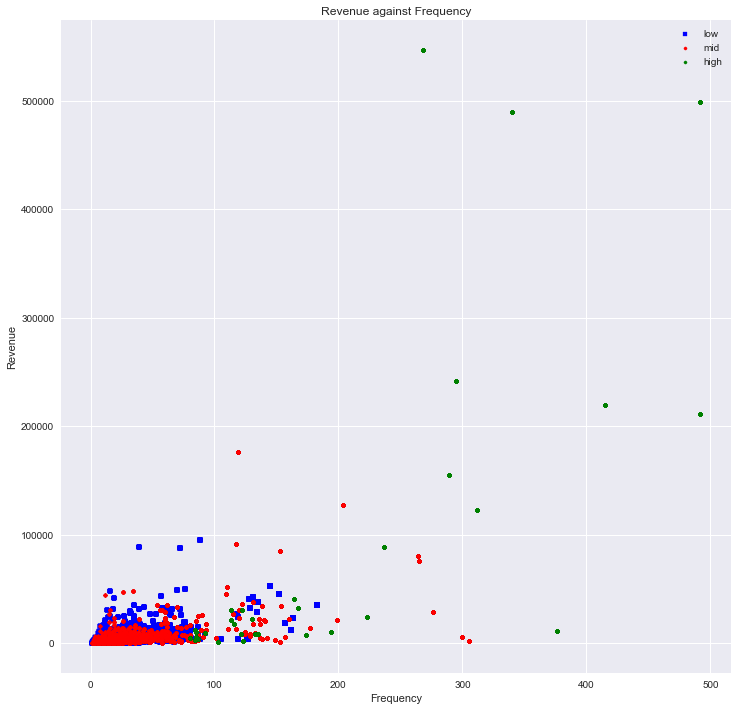

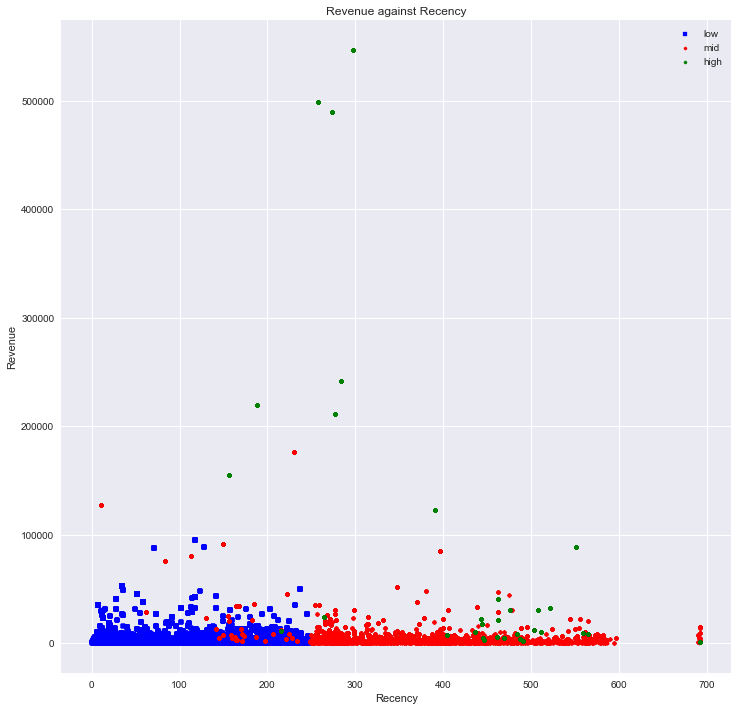

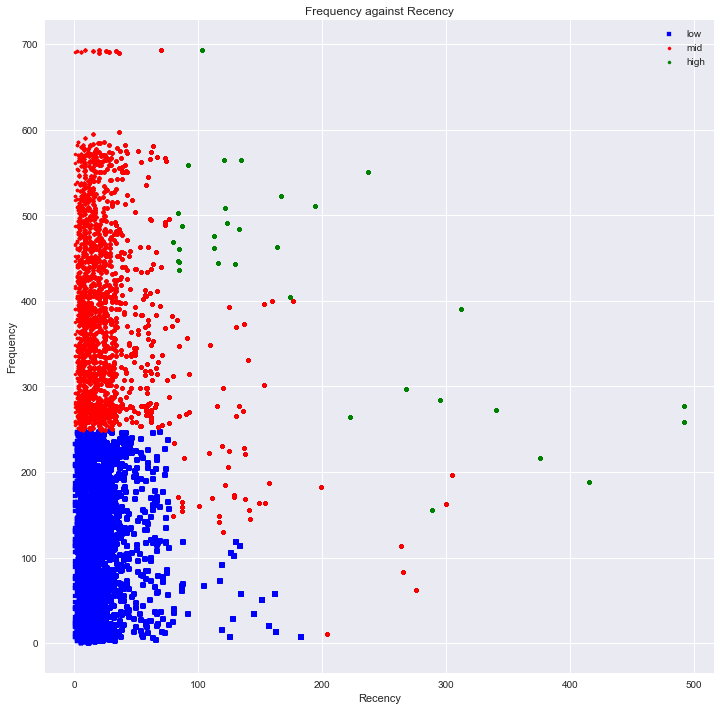

In [19]:
plot_clusters(CLV_df)

We see that the clusters for recency, frequency and revenue are distinct from one another. 

There are not many high value customers, which is expected given the low recency, frequency (most are one time purchases), and revenue, resulting in a low or mid customer lifetime value.

In [20]:
CLV_7m, CLV_14m = split_months(CLV_df)

## Classification

### Data Preparation

In [21]:
CLV_merged = get_CLV_merged(CLV_14m, CLV_df)

               count          mean           std          min           25%  \
CLV_cluster                                                                   
0            86014.0  5.443014e+05  1.354930e+06         0.00  1.786848e+04   
1             1486.0  2.913786e+07  1.032204e+07  20039406.00  2.099000e+07   
2             1202.0  9.143702e+07  1.281734e+07  71187320.25  9.106914e+07   

                      50%           75%           max  
CLV_cluster                                            
0            8.057412e+04  3.499973e+05  1.301400e+07  
1            2.131931e+07  3.821920e+07  4.481069e+07  
2            9.106914e+07  1.038889e+08  1.038889e+08  




We note that the dataset is imbalanced since 97% of the customers belong to cluster 0 (low value customers).

### Correlation between overall_score and CLV_cluster

Before building the model, let's look at the correlation between our predictor, overall RFM score, and response, CLV_cluster. Let's also do the same for CLV (the absolute number).

CLV_cluster          1.000000
m14_Revenue          0.962688
revenue              0.909255
revenue_cluster      0.850241
frequency            0.688771
frequency_cluster    0.635995
overall_score        0.417026
payment_value        0.302010
recency_cluster      0.021482
price                0.021172
recency              0.013635
Name: CLV_cluster, dtype: float64


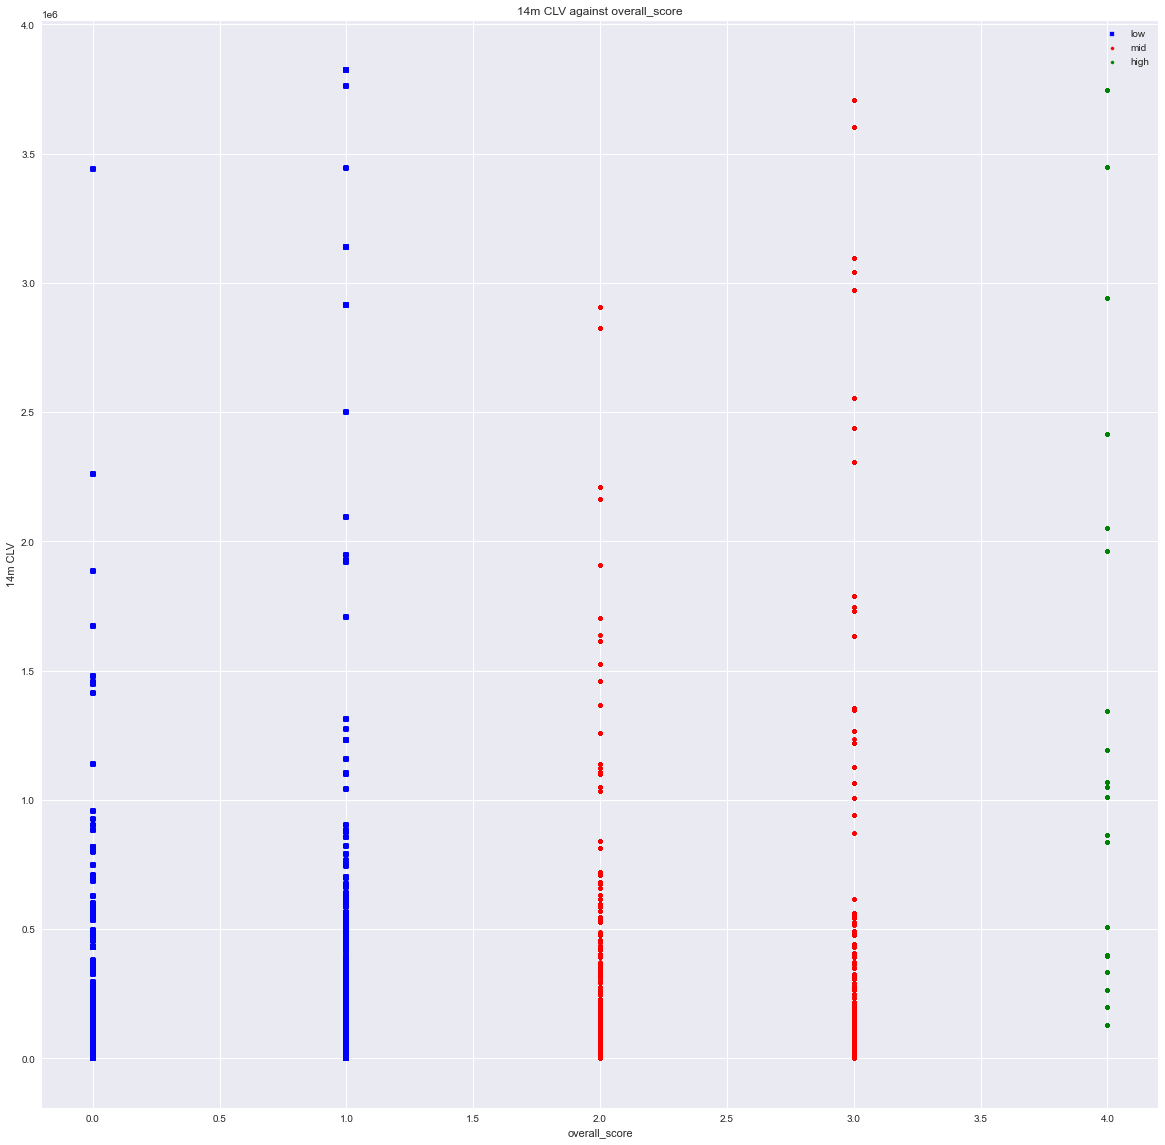

In [22]:
correlation_plot(CLV_merged)
print_correlation(CLV_merged)

From the correlation numbers, we see that revenue, frequency and overall_score will be helpful in predicting CLV_cluster.

The scatter plot also makes it quite clear that there is a positive correlation between overall_score in particular and CLV: the higher the RFM score, the higher the CLV.

### XGBoost Classification Model

In order for us to use XGBoost to predict CLV based on the "category" column, we need to convert the categorical values to numeric first, using one hot encoding.


In [23]:
CLV_merged = one_hot_encoding(CLV_merged)

[21:48:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGB classifier on training set: 0.97
Accuracy of XGB classifier on test set: 0.97
f1 score is: 0.829


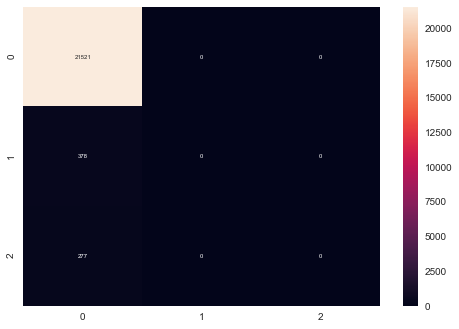

In [26]:
XGB_classification(CLV_merged)

Keeping in mind that our data is so imbalanced (97% of all customers are in the low value cluster), our predictor almost always predicts any given customer as a low value customer and this leads to high accuracy, which tells us nothing about how well our model is doing.

This means that using accuracy as a metric is not ideal, and we use f1 score instead, which takes into account this class imbalance. We consider recall to be twice as important as precision in our model - it is worse to misclassify a mid/high value customer to be low value and miss out on engagement, than to misclassify a low value customer to be mid/high value. We find that we get a pretty good f1 score of 0.830.

Now that we have the segmentation, we can start taking actions. The goals for each group are as follows:

*   Low Value: increase frequency
*   Mid Value: increase frequency + improve retention 
*   High Value: improve retention